The data comes from Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. There are different .csv files, each describing the monthly average temperature (celsius), for different geographic levels :
Global Average Temperature by Country, State, Major Cities, All cities and Ocean 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
from plotly.subplots import make_subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import time
from time import strptime
from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')



In [48]:
global_temp_country = pd.read_csv('/home/divyeshj/Data Science with Python/Project/Project Climate/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head(2)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland

In [3]:
#Removing the duplicated countries and countries with no information

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Taking average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

It is noticable how the temperature gradually increases while coming close to equator.Hence, countires like Russia and canada have low average temperature when compared to countries closer to equator. The lowest temperature is recorded in Greenland. The hottest country is Africa.


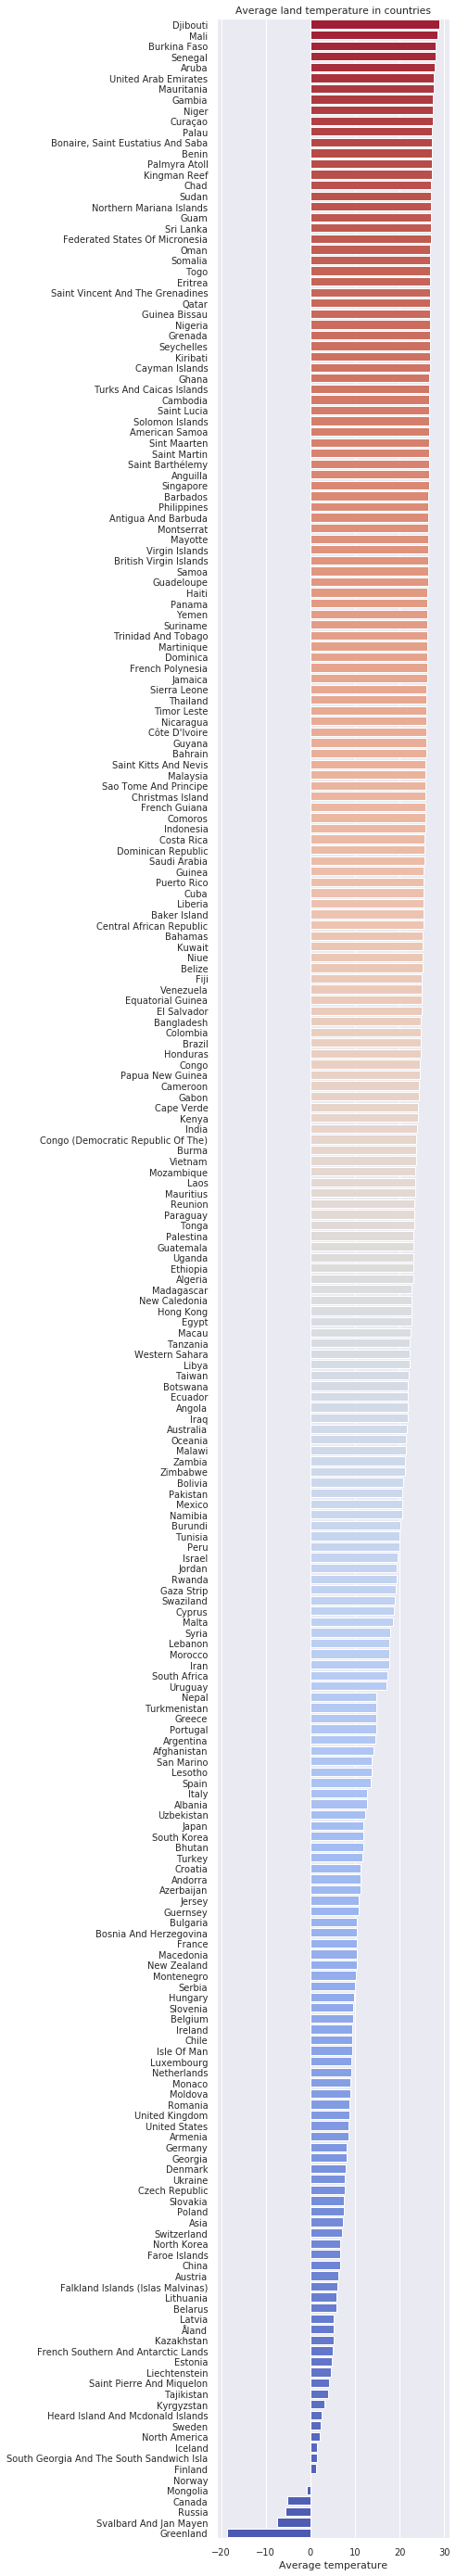

In [4]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

 Dijbouti is the warmest (≈30°C) country and Greenland is the coldest (≈-20°C) country of the world. 

In [5]:
global_temp = pd.read_csv("/home/divyeshj/Data Science with Python/Project/Project Climate/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
global_temp.head(2)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN

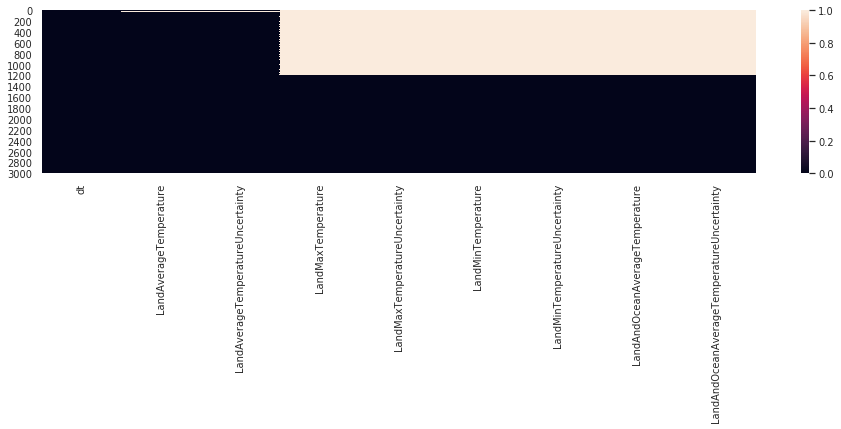

In [6]:
#Creating a copy of the data for future graphs
copy = global_temp.copy()

#Removing Missing values
global_temp.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(global_temp.isna())


In [7]:
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

The uncertainties of the temperature accuracy have been reduced over the time due to the advancement of technologies. Whereas on the other hand, there have been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind. 

In [8]:

#Extracting the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The average temperature of Earth surface has the highest value in the last three decades. The fastest temperature growth occurred in the last 30 years. This chart also have error range, which shows that measurement of temperature has become more accurate in the last few years. 


In [9]:
#For complete and smooth time series data, I have deleted all rows that have at least one missing value.

global_temp.dropna(axis = 0, inplace = True)

#converting all dates to the same format
global_temp['Date'] = pd.to_datetime(global_temp.dt) 

data2 = global_temp.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
# data2['week'].value_counts()

earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(2)

year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850                7.900667                           0.876417   
1  1851                8.178583                           0.881917   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           13.476667                       2.394833            1.964333   
1           13.081000                       2.397250            2.203917   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       1.571167                       14.867167   
1                       1.632417                       14.991833   

   LandAndOceanAverageTemperatureUncertainty turnpoint  
0                                   0.308167    before  
1                                   0.312083    before

In more developed countries the temperature began to register much earlier. Mankind must reflect and take all necessary remedies to reduce emissions of greenhouse gases in the atmosphere. 

In [10]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", 
                                                                 size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], 
                         y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), 
                         showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], 
                         y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), 
                         showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], 
                         y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), 
                         showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], 
                         y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), 
                         showlegend=False),
             row = 2, col = 2)

We can see that since the 1980 there has been a continuous increase in mean annual temperatures. Therefore, we can clearly agree that Global Warming is real!

In [11]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], 
                     y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], 
                     y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], 
                     y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], 
                     y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, 
                     name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

This is the best way to analysie the after affects of global warming since 1980. It interprets that 1975 was no turning back point.
Land Average Temperature - an increase from 8.37 degrees to 9.20  (almost 1°C)
Land Minimum Temperatures - an increase from 2.45 degrees to 3.64 (1.19°C)
Land Maximum Temperature - an increase from 14.18 degrees to 14.89 (0.71°C)
Land and Ocean Average Temperature - an increase from 15.06 degrees to 15.62 (0.56°C)

## Continents based Temperature Growth Rate analysis

In [12]:
# Reading the file (countries + cities)
countries = pd.read_csv("/home/divyeshj/Data Science with Python/Project/Project Climate/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")

#creating a column and grouping by year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("/home/divyeshj/Data Science with Python/Project/Project Climate/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()


In [13]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], 
                         y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], 
                         y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], 
                         y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], 
                         y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], 
                         y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), 
                     y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), 
                     y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)

The globe revolves with a slight inclination. This orbital variation creates the fluctuation in the temperatures. It can be seen here that before 1980 when the global warming was not present, the seasonality is not repeating and there does not exist any sequence.

<img src="https://image.businessinsider.com/5d079cfe6fc92046153c4b73?width=1200&format=jpeg&auto=webp" width="600"/>

In [14]:
# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, I have added 6 to all temperatures
# to "standardize the data"   
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map - Temperature increase')
fig.show()

All continents seems to have increased Temperature in about the same pace. Initial years have some fluctuations due to absence of data of some nations, but the biggest increases are visible in Europe, South America and West Asia.

In [15]:
# Calculating the difference column
mean = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()
maximum = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()
difference = pd.merge(left = mean, right = maximum, on = ['region','Country','alpha-3'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']
difference.rename(columns = {'AverageTemperature_y':'Maximum Average Temperature',
                             'AverageTemperature_x':'Overall Avg Temp'}, inplace = True)

# Figure
fig = px.scatter_geo(difference, locations="alpha-3", color="Overall Avg Temp", #we color by average temp
                     hover_name="Country", size="diff", size_max=15, #we size by how big is the difference
                     projection="natural earth", opacity = 0.8,
                     color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
                     title = 'Global Map - difference between the mean and max temperatures')
fig.show()

* Bubbles infer Countries, 
* Bubble's COLOR infer the difference between mean and max temperature,
* Bubble's Size infer the increase in temperature

The biggest temperature changes were in Europe and South America.
There is again the question, as we see that more colder countries (situated to the North) had a biggest increase in Temperature than the overall South.

In [16]:
# Data
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 3500, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

The Bar Chart above shows which country has been hit by the global warming and by how much. 
Countries rank - from the biggest to smallest increase in temperature since 1825:

1)Brazil - Brazil has Amazon Rainforest which is known as the lungs of the Earth. The reason is deforestation and wildfires in the amazon.

2)Nepal - Air Pollution. 1 in 10 Nepalese suffer from chronic lung problem, and the life expectancy of a new born is shorter by 2 years due solely to problems air quality related. (https://www.nepalitimes.com/here-now/air-pollution-is-more-dangerous-than-smoking/).

3)Kazakhstan - testing biological and nuclear weapons by the soviets, polluting industries. Most of the water is infected by industrial and agricultural runoff. (http://factsanddetails.com/central-asia/Kazakhstan/sub8_4f/entry-4681.html)

4)Turkmenistan - Desertification and drying of the Aral Sea, due to HEAVY agricultural practices. (https://en.wikipedia.org/wiki/Environmental_issues_in_Turkmenistan)


Brazil has the highest temperature difference.  Due to this tremendous variation of Brazil. My next goal is to predict the forecasting for Rio De Janerio. 

## Extrapolation of Rio De Janerio 

In [17]:
# Reading and transforming the file
cities = pd.read_csv('/home/divyeshj/Data Science with Python/Project/Project Climate/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
rio = cities.loc[cities['City'] == 'Rio De Janeiro', ['dt','AverageTemperature']]
rio.columns = ['Date','Temp']
rio['Date'] = pd.to_datetime(rio['Date'])
rio.reset_index(drop=True, inplace=True)
rio.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
rio = rio.loc['1900':'2013-01-01']
rio = rio.asfreq('M', method='bfill')
rio.head()

Temp
Date              
1900-01-31  25.780
1900-02-28  26.160
1900-03-31  23.868
1900-04-30  23.467
1900-05-31  22.667

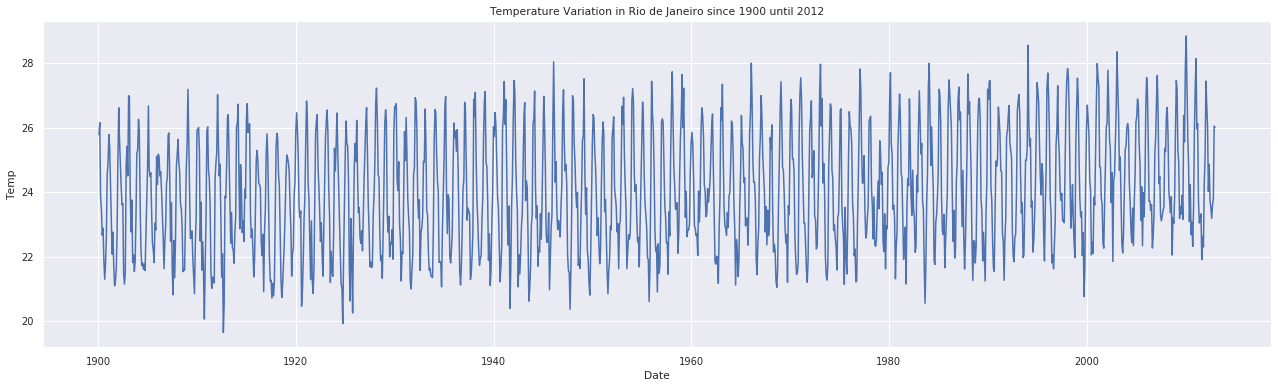

In [18]:
plt.figure(figsize=(22,6))
sns.lineplot(x=rio.index, y=rio['Temp'])
plt.title('Temperature Variation in Rio de Janeiro since 1900 until 2012')
plt.show()

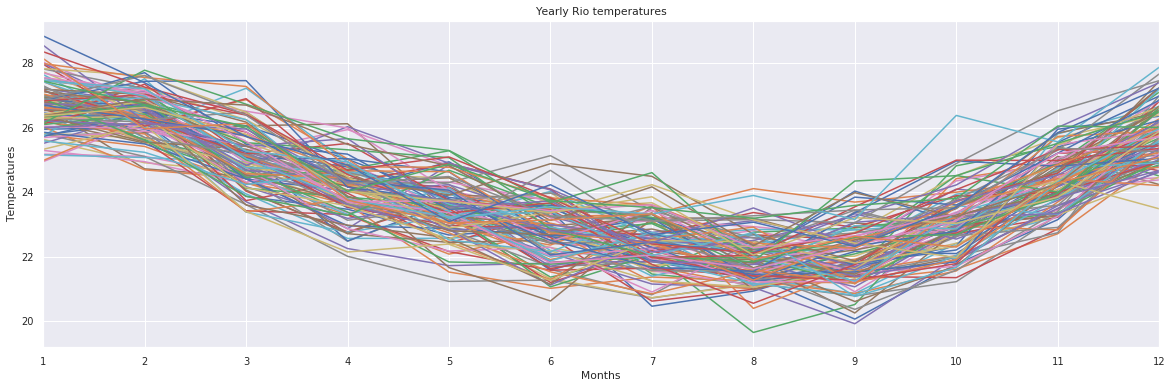

In [19]:
rio['month'] = rio.index.month
rio['year'] = rio.index.year
pivot = pd.pivot_table(rio, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly Rio temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()


The series clearly has some seasonality, the higher temperatures are around November and February and the lower are between July and September. The trend of temperature throughout the year (since 1900 until 2012)

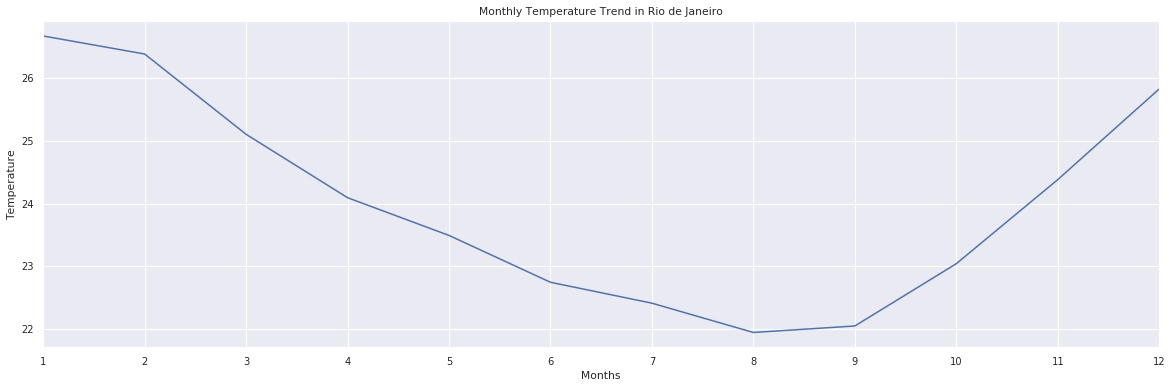

In [20]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperature Trend in Rio de Janeiro')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

Yearly Trend of temperature variation in Rio de Janerio (Mean of previous plot). It appears that there is some seasonality with higher temperatures at the begining and end of the year and lower temperatures around the middle of the year.

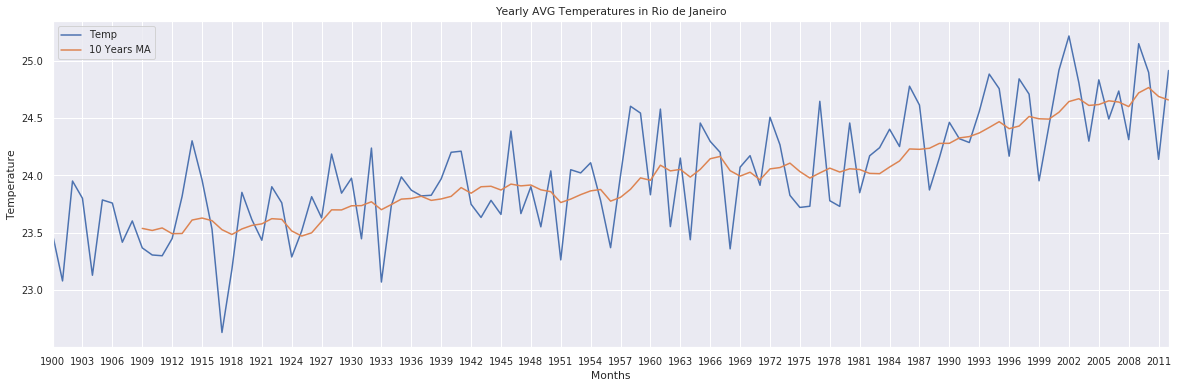

In [21]:
year_avg = pd.pivot_table(rio, values='Temp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['Temp'].rolling(10).mean()
year_avg[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Rio de Janeiro')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()


Overall Trend of climate change in Rio De Janerio. There is a constant increasing trend and that the average temperature increased from 23.5º to 24.5º, that's 4.25% in over a century.

In [22]:
rio

Temp  month  year
Date                           
1900-01-31  25.780      1  1900
1900-02-28  26.160      2  1900
1900-03-31  23.868      3  1900
1900-04-30  23.467      4  1900
1900-05-31  22.667      5  1900
...            ...    ...   ...
2012-08-31  23.186      8  2012
2012-09-30  23.588      9  2012
2012-10-31  23.807     10  2012
2012-11-30  26.051     11  2012
2012-12-31  26.009     12  2012

[1356 rows x 3 columns]

I'm going to split the data in training, validation and test set. After training the model, I will use the last 5 years to do the data validation and test, being 48 months to do a month by month validation (walk forward) and 12 months to make an extrapolation for the future and compare to the test set:

In [23]:
train = rio[:-60].copy()
val = rio[-60:-12].copy()
test = rio[-12:].copy()

In [24]:
# Excluding the first line and all NaN values
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2008-02-29    26.362
2008-03-31    26.631
2008-04-30    25.793
2008-05-31    24.031
2008-06-30    23.713
Freq: M, Name: Temp, dtype: float64

RMSE function to calculate error

In [25]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 1.3282 celsius degrees


Using SARIMA Model:(Seasonal-s, Auto Regressive-p, Integrated-d, Moving Average-q)

To create a time series forecast, the series must be stationary (constant mean, variance and autocorrelation).

Checing if the series is stationary using the adfuller function, if the P-Value is lower than 5% (usual number used for this kind of study) the series is stationary.

In [26]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rio de Janeiro Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2); #autocorrelation
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3); #partial Autocorrelation
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -3.7599
p-value                           0.0033
Lags Used                        23.0000
Number of Observations Used    1272.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


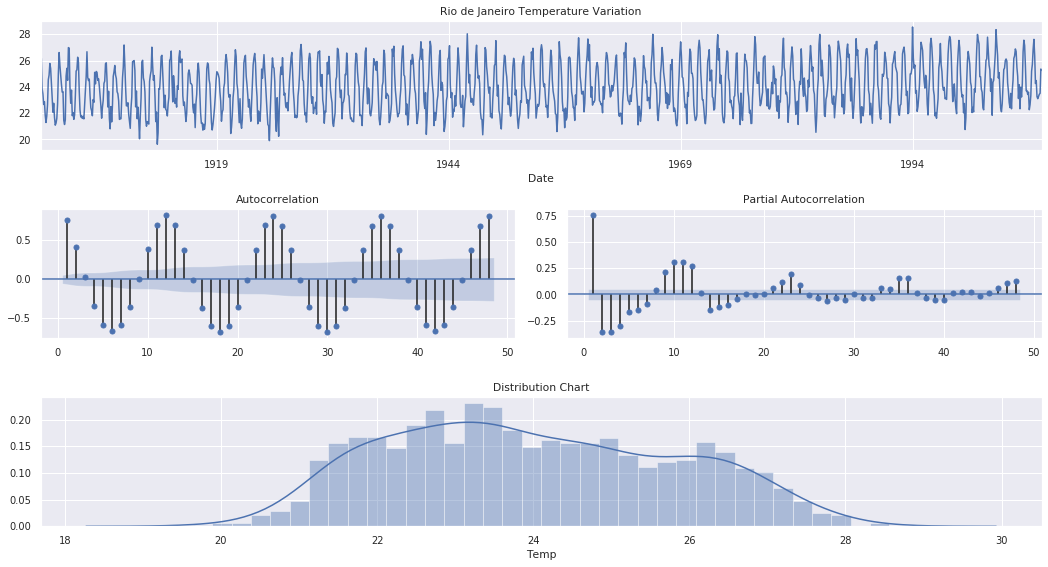

In [27]:
# The first approach is to check the series without any transformation
check_stationarity(train['Temp'])

The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 6 and repeating each 12 months. Because of the seasonal difference, temperatures usually walk in opposite directions.

Also, from lag 12 and sequentially from every 12 lags there is a significant positive autocorrelation. The PACF shows a positive spike in the first lag and a drop to negative in the following lags. AR(1) Model

Last plot shows the distribution of temperatures.

Results of Dickey-Fuller Test:
Test Statistic                  -13.4631
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1260.0000
Critical Value (1%)              -3.4356
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


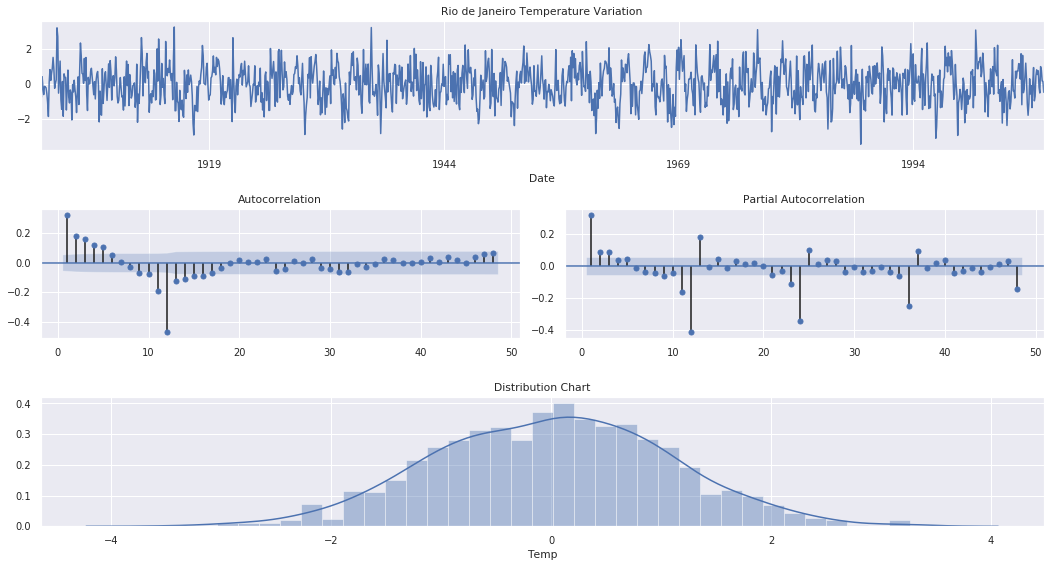

In [28]:
check_stationarity(train['Temp'].diff(12).dropna())
#plotting the stationarity function again with the first seasonal difference to understand stationarity

As the plots above showed, the first **ACF** lags have a gradual decay, while the **PACF** drops under the confidence interval after the third lag, this is an **AR** signature with a parameter of 3, so this is an **AR(3)** model.

As we used a first seasonal difference, the **ACF** and **PACF** showed a significative drop in the 12th lag, it means an **SMA** signature with a parameter of 1 lag, resuming this is an **SAR(1) with a first difference**.


In [29]:

#creating a function to use one-step-forecast in the whole validation set and measure the error:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

### Testing in the validation set:

In [30]:
#(p,d,q) orders: (3, 0, 0), and with the following seasonal (P, D, Q, S) orders (0,1,1,12) 
#and as the series has a clear uptrend i'm going to use it in the model ('c').
val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((3,0,0),(0,1,1,12),'c'))

In [31]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.7874 celsius degrees
It's a decrease of -40.72% in the RMSE


In [32]:
# Creating the error column
val['Error'] = val['Temp'] - val['Pred']

In [33]:
#creating a function to plot some important charts to help us visualize the residuals.

def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual to see if there is some correlation left
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [34]:
#removing columns to plot the charts
val.drop(['month','year'], axis=1, inplace=True)
val.head()

Temp       Pred     Error
Date                                   
2008-01-31  26.362  26.921369 -0.559369
2008-02-29  26.631  26.707667 -0.076667
2008-03-31  25.793  25.489340  0.303660
2008-04-30  24.031  24.593364 -0.562364
2008-05-31  23.713  23.856262 -0.143262

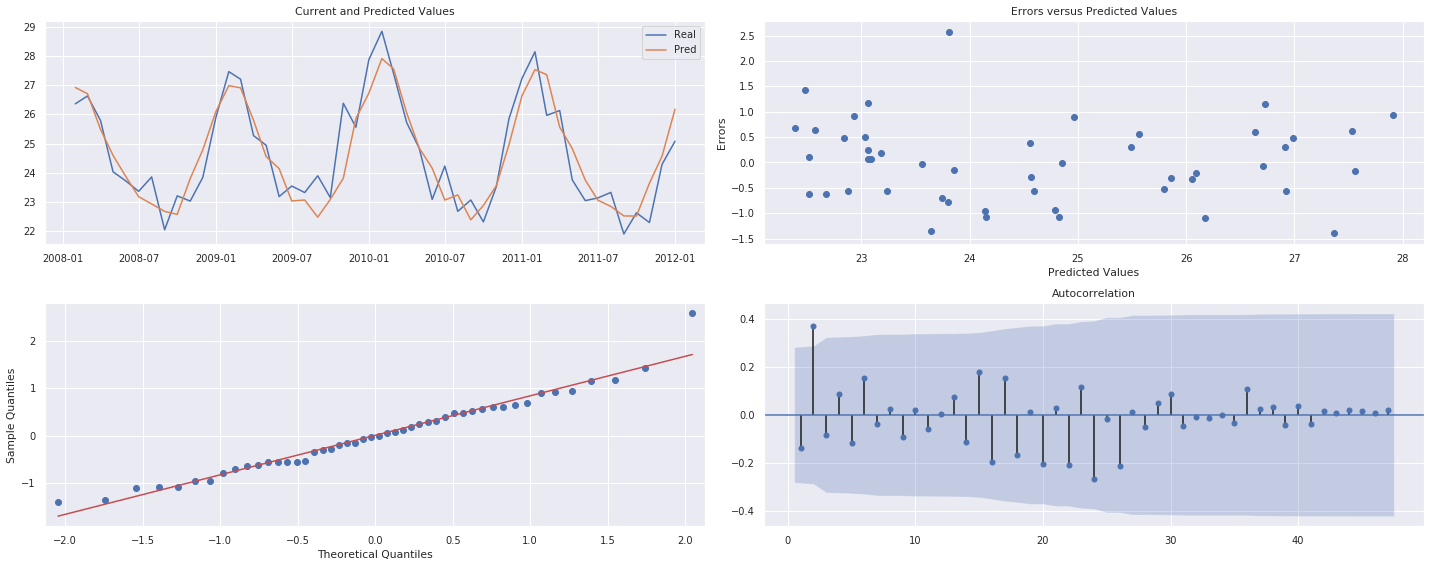

In [35]:
plot_error(val)

Analyzing the plots above we can see that the predictions fit very well on the current values.

The **Error vs Predicted values** has a linear distribution (the errors are between -1.5 and +1.5 while the temperature increases).

The QQ Plot shows a normal pattern with some little outliers and,

The autocorrelation plot shows a positive spike over the confidence interval just above the second lag

## Extrapolation- Predicting for the last 12 months (Test set):

In [36]:
#Creating the new concatenating the training and validation set:
future = pd.concat([train['Temp'], val['Temp']])
future.head()

Date
1900-01-31    25.780
1900-02-28    26.160
1900-03-31    23.868
1900-04-30    23.467
1900-05-31    22.667
Name: Temp, dtype: float64

In [37]:
# Using the same parameters of the fitted model
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

In [38]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

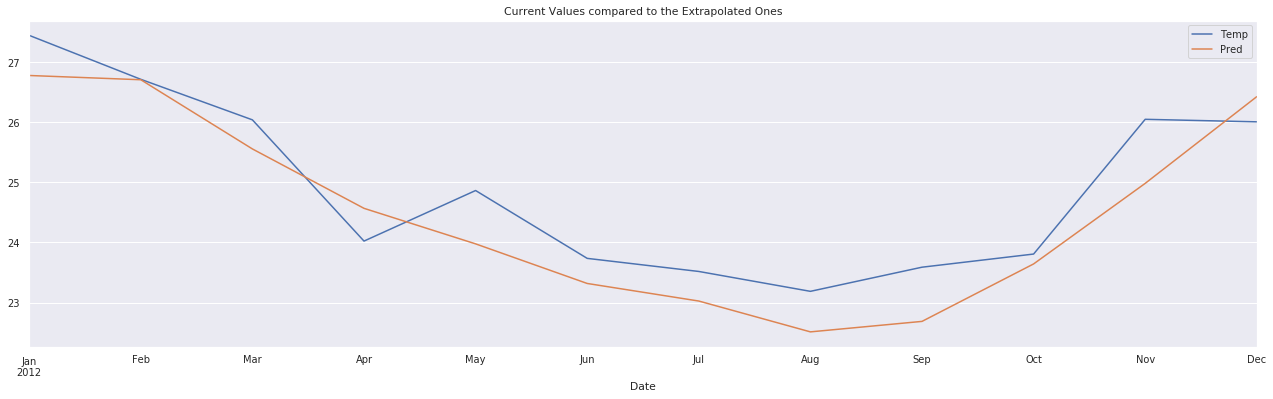

In [39]:
#creating a new column on the test set with the predicted values 
#and comparing them against the real values
test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

It seems that the SARIMA parameters were well fitted, the predicted values are following the real values and also the seasonal pattern.

### Evaluating the model with the RMSE in the test set (baseline against the extrapolation):

In [40]:
test_baseline = test['Temp'].shift()

test_baseline[0] = test['Temp'][0]

rmse_test_base = measure_rmse(test['Temp'],test_baseline)
rmse_test_extrap = measure_rmse(test['Temp'], test['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} celsius degrees')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} celsius degrees')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

The baseline RMSE for the test baseline was 1.02 celsius degrees
The baseline RMSE for the test extrapolation was 0.63 celsius degrees
That is an improvement of 37.95%


## Logistic Regression, Naive Bayes and Decision Tree on Bank Marketing Dataset:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [41]:
bank = pd.read_csv('http://people.bu.edu/kalathur/datasets/bank-full.csv', sep=';')
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

Logistic regression model to fit the conversion (last column) using the entire dataset.


In [42]:
logbank = bank.copy()
#Target
logbank['y'] = (logbank['y'] == 'yes').astype('int')
logbank['y']

#Changing months to numerical values
logbank['month'] = [strptime(logbank.loc[i, 'month'], '%b').tm_mon for i in range(len(logbank))]

#Numerical features
numerical_features = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

# Creating binary features
#Two highest job counts are blue-collar and management
logbank['blue-collar'] = (logbank['job'] == 'blue-collar').astype('int')
logbank['management'] = (logbank['job'] == 'management').astype('int')

logbank['married'] = (logbank['marital'] == 'married').astype('int')

#Two highest education counts are secondary and tertiary
logbank['secondary'] = (logbank['education'] == 'secondary').astype('int')
logbank['tertiary'] = (logbank['education'] == 'tertiary').astype('int')

logbank['default'] = (logbank['default'] == 'yes').astype('int')

logbank['housing'] = (logbank['housing'] == 'yes').astype('int')

logbank['loan'] = (logbank['loan'] == 'yes').astype('int')

logbank['cellular'] = (logbank['contact'] == 'cellular').astype('int')
logbank['telephone'] = (logbank['contact'] == 'telephone').astype('int')
logbank['unknown_contact'] = (logbank['contact'] == 'unknown').astype('int')

logbank['successful_poutcome'] = (logbank['poutcome'] == 'success').astype('int')
logbank['failed_poutcome'] = (logbank['poutcome'] == 'failure').astype('int')

binary_features = ['blue-collar', 'management', 'married', 'secondary', 'tertiary', 'housing', 'loan', 
                   'cellular', 'telephone', 'unknown_contact', 'successful_poutcome', 'failed_poutcome']

logbank

age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  ...  blue-collar  management  married  secondary  \
0         0    unknown    5  ...            0           1        1          0   
1         0    unknown    5  ...            0           0        0          1   
2         1    unknown    5  ...            0           0        1          1   
3         0    unknown    5  ...            1           0        1          0   
4         0    unknown    5  ...            0           0        0          0   
...     ...        ...  ...  ...          ...         ...      ...        ...   
45206     0   cellular   17  ...            0           0        1          0   
45207     0   cellular   17  ...            0           0        0          0   
45208     0   cellular   17  ...            0           0        1          1   
45209     0  telephone   17  ...            1           0        1          1   
45210     0   cellular   17  ...            0           0        1          1   

       tertiary cellular  telephone  unknown_contact  successful_poutcome  \
0             1        0          0                1                    0   
1             0        0          0                1                    0   
2             0        0          0                1                    0   
3             0        0          0                1                    0   
4             0        0          0                1                    0   
...         ...      ...        ...              ...                  ...   
45206         1        1          0                0                    0   
45207         0        1          0                0                    0   
45208         0        1          0                0                    1   
45209         0        0          1                0                    0   
45210         0        1          0                0                    0   

       failed_poutcome  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
45206                0  
45207                0  
45208                0  
45209                0  
45210                0  

[45211 rows x 27 columns]

In [43]:
#Logistic Regression
X = logbank[numerical_features + binary_features]
y = logbank['y']

logreg = LogisticRegression(C=1e5, solver='lbfgs')

logreg.fit(X, y)
y_pred = logreg.predict(X)

print("Model Accuracy:",metrics.accuracy_score(y, y_pred))

Model Accuracy: 0.8888766008272323


In [44]:
feature_names = bank.columns[:-1]
target = bank.columns[-1]

X = bank[feature_names]
y = bank[target]

#Label encoding to all 'Object' columns
objects = X.loc[:, X.dtypes == object].columns
le = preprocessing.LabelEncoder()
for i in objects:
    #Fit label encoder and return encoded labels
    X.loc[:,i] = le.fit_transform(X[i])
X

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
0        5      8       261         1     -1         0         3  
1        5      8       151         1     -1         0         3  
2        5      8        76         1     -1         0         3  
3        5      8        92         1     -1         0         3  
4        5      8       198         1     -1         0         3  
...    ...    ...       ...       ...    ...       ...       ...  
45206   17      9       977         3     -1         0         3  
45207   17      9       456         2     -1         0         3  
45208   17      9      1127         5    184         3         2  
45209   17      9       508         4     -1         0         3  
45210   17      9       361         2    188        11         1  

[45211 rows x 16 columns]

Gaussian Naïve Bayes classifier to build the model for the conversion (last column) using
the entire dataset.

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          bank.shape[0],
          (y_test != y_pred).sum(),
          100*(1-(y_test != y_pred).sum()/bank.shape[0])
))

Number of mislabeled points out of a total 45211 points : 2156, performance 95.23%


Decision tree for conversion (last column) using Gini and Entropy separately using the
entire dataset. 

In [50]:
faeature_names = bank.columns[:-1]
target = bank.columns[-1]
target_name = (bank[target]).unique()

X = bank[feature_names]
y = bank[target]

#Label encoding to all 'Object' columns
objects = X.loc[:, X.dtypes == object].columns
le = preprocessing.LabelEncoder()
for i in objects:
    #Fit label encoder and return encoded labels
    X.loc[:,i] = le.fit_transform(X[i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

X_train

age  job  marital  education  default  balance  housing  loan  contact  \
24084   49    0        1          1        0    10250        1     0        1   
44095   71    5        0          3        0      392        0     0        1   
42972   36    8        2          3        0      417        0     0        0   
21484   31    4        1          1        0        0        0     0        0   
20900   34    9        2          2        0     2195        0     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
36605   39    1        1          0        0      398        1     0        0   
28201   26    9        2          2        0      252        1     0        0   
867     26    1        2          1        0       24        1     0        2   
12970   30    0        2          1        0       52        0     1        0   
31525   58    9        1          1        0        1        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
24084   24     10        97         1     -1         0         3  
44095    7      5       276         2     -1         0         3  
42972   10      3       151         1     -1         0         3  
21484   19      1        81         2     -1         0         3  
20900   13      1       490         3     -1         0         3  
...    ...    ...       ...       ...    ...       ...       ...  
36605   12      8       256         1     -1         0         3  
28201   29      4       187         1     -1         0         3  
867      7      8       180         1     -1         0         3  
12970    7      5       422         1     -1         0         3  
31525    2      0       333         1     64         2         0  

[31647 rows x 16 columns]

Gini Accuracy: 0.8793866116189915


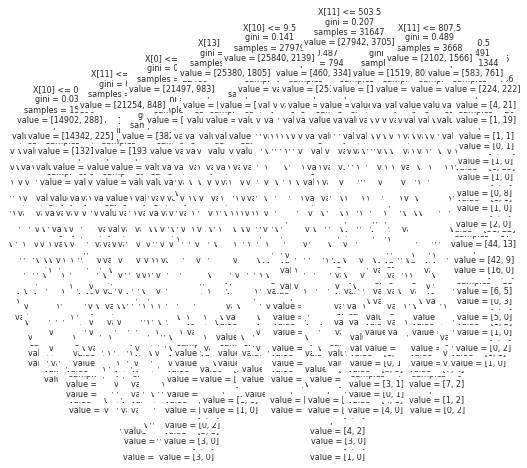

In [51]:
#Gini
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Gini Accuracy:",metrics.accuracy_score(y_test, y_pred))


plt.figure(figsize=(8,8))
plot_tree(clf, fontsize=8);

In [53]:
#Entropy
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Entropy Accuracy:",metrics.accuracy_score(y_test, y_pred))


Entropy Accuracy: 0.8870539663815984


## Thank You